# Práctica Deep Learning - Armando Bueno

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', None) # para mostrar todas las filas
pd.set_option('display.max_columns', None) # para mostrar todas las columnas

In [3]:
# Nos descargamos el dataset de OpenDataSoft
!wget -O "airbnb-listings-extract.csv" "https://public.opendatasoft.com/explore/dataset/airbnb-listings/download/?format=csv&disjunctive.host_verifications=true&disjunctive.amenities=true&disjunctive.features=true&refine.country=Spain&q=Madrid&timezone=Europe/London&use_labels_for_header=true&csv_separator=%3B"


--2023-02-05 11:39:06--  https://public.opendatasoft.com/explore/dataset/airbnb-listings/download/?format=csv&disjunctive.host_verifications=true&disjunctive.amenities=true&disjunctive.features=true&refine.country=Spain&q=Madrid&timezone=Europe/London&use_labels_for_header=true&csv_separator=%3B
Resolving public.opendatasoft.com (public.opendatasoft.com)... 34.249.199.226, 34.248.20.69
Connecting to public.opendatasoft.com (public.opendatasoft.com)|34.249.199.226|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/csv]
Saving to: ‘airbnb-listings-extract.csv’

airbnb-listings-ext     [    <=>             ]  54.31M  3.06MB/s    in 20s     

2023-02-05 11:39:30 (2.71 MB/s) - ‘airbnb-listings-extract.csv’ saved [56950929]



In [4]:
# Leemos el dataset con pandas y mostramos los 5 primeros registros
import pandas as pd
full_df = pd.read_csv('./airbnb-listings-extract.csv', sep=';', decimal='.')
full_df.head(5).T

,0,1,2,3,4
ID,3150371,3378181,2070750,9832499,1868170
Listing Url,https://www.airbnb.com/rooms/3150371,https://www.airbnb.com/rooms/3378181,https://www.airbnb.com/rooms/2070750,https://www.airbnb.com/rooms/9832499,https://www.airbnb.com/rooms/1868170
Scrape ID,20170407214119,20170407214119,20170407214119,20170407214119,20170407214119
Last Scraped,2017-04-08,2017-04-08,2017-04-08,2017-04-08,2017-04-08
Name,Double room + bathroom - La Latina,"Ópera/Plz Mayor -- A/C, elevator",Centric room with a balcony,PLAZA DE ESPAÑA - Único - Gimnasio.,"Loft/duplex 150m2, 3 double rooms"
Summary,"Double room with own bathroom in La Latina, in...",Old world charm meets modern comfort in our ne...,Lominous room for rent in the heart of the old...,"Ubicado en el famoso edificio Torre de Madrid,...","Huge, open plan spacious apartment in the cent..."
Space,The apartment is spacious and cozy. It is 90 m...,"Designed with the traveler in mind, our one-be...",Lominous room for rent in the heart of the old...,"Ubicado en el famoso edificio Torre de Madrid,...","Huge, open plan spacious apartment in the cent..."
Description,"Double room with own bathroom in La Latina, in...",Old world charm meets modern comfort in our ne...,Lominous room for rent in the heart of the old...,"Ubicado en el famoso edificio Torre de Madrid,...","Huge, open plan spacious apartment in the cent..."
Experiences Offered,none,none,none,none,none
Neighborhood Overview,La Latina is one of the most famous neighbourh...,The neighborhood is steeped in history and clo...,-,NaN,NaN


In [5]:
# vamos a ver de cuantos registros disponemos y de cuantas variables
full_df.shape

(14001, 89)

In [6]:
# ¿De qué variables disponemos?
full_df.columns

Index(['ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary',
       'Space', 'Description', 'Experiences Offered', 'Neighborhood Overview',
       'Notes', 'Transit', 'Access', 'Interaction', 'House Rules',
       'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url',
       'Host ID', 'Host URL', 'Host Name', 'Host Since', 'Host Location',
       'Host About', 'Host Response Time', 'Host Response Rate',
       'Host Acceptance Rate', 'Host Thumbnail Url', 'Host Picture Url',
       'Host Neighbourhood', 'Host Listings Count',
       'Host Total Listings Count', 'Host Verifications', 'Street',
       'Neighbourhood', 'Neighbourhood Cleansed',
       'Neighbourhood Group Cleansed', 'City', 'State', 'Zipcode', 'Market',
       'Smart Location', 'Country Code', 'Country', 'Latitude', 'Longitude',
       'Property Type', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms',
       'Beds', 'Bed Type', 'Amenities', 'Square Feet', 'Price', 'Weekly Price',
       'Month

Se ve que gran parte de los datos no aportan información relevante. Se van a eliminar de inmediato las columnas:

- Listing Url
- Scrape ID: no aporta información sobre la propiedad.
- Last Scraped: no aporta información sobre la propiedad.
- Medium Url
- Picture Url
- XL Picture Url
- Host ID: aporta información sobre el dueño, pero no sobre la propiedad (podría revisarse su inclusión si los resultados no son buenos).
- Host Url
- Host Name: no aporta información sobre la propiedad. Podría ser de interés estadístico otro tipo de dato categórico del dueño (rango de edad, sexo...) pero no el nombre.
- Host Picture Url
- Host Neighbourhood: no aporta información sobre la propiedad.
- Weekly Price: información redundante que puede actuar como predictor (y no debe)
- Monthly Price: información redundante que puede actuar como predictor (y no debe)
- Calendar Updated: información irrelevante; se podría inferir la frecuencia de actividad del dueño, pero YA hay un dato explícito de su tasa de respuesta.
- Calendar last Scraped: no aporta información sobre la propiedad.
- First review: no aporta información nueva; ya hay un dato de antiguedad del dueño.
- Last review: no aporta información nueva.
- Reviews per Month: no aporta información nueva
- Geolocation: es latitud + longitud
- Host Listings Count, Host Total Listings Count, Calculated host listings count: contador relacionado con el dueño; no aporta información sobre la propiedad.


In [7]:
# Hacemos un drop de todas las columnas que OBVIAMENTE no aportan información relevante
not_useful_columns = [
    'ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Medium Url', 
    'Picture Url', 'XL Picture Url', 'Host ID', 'Host URL', 'Host Name', 
    'Host Thumbnail Url', 'Host Picture Url', 'Host Neighbourhood', 'Weekly Price', 
    'Monthly Price', 'Calendar Updated', 'Calendar last Scraped', 'First Review', 
    'Last Review', 'Reviews per Month', 'Geolocation', 'Calculated host listings count',
    'Host Listings Count', 'Host Total Listings Count', 'Security Deposit', 'Cleaning Fee'
]

full_df.drop(not_useful_columns, axis=1, inplace=True)

# simpledf = full_df[not_useful_columns]

In [8]:
full_df.columns

Index(['Name', 'Summary', 'Space', 'Description', 'Experiences Offered',
       'Neighborhood Overview', 'Notes', 'Transit', 'Access', 'Interaction',
       'House Rules', 'Thumbnail Url', 'Host Since', 'Host Location',
       'Host About', 'Host Response Time', 'Host Response Rate',
       'Host Acceptance Rate', 'Host Verifications', 'Street', 'Neighbourhood',
       'Neighbourhood Cleansed', 'Neighbourhood Group Cleansed', 'City',
       'State', 'Zipcode', 'Market', 'Smart Location', 'Country Code',
       'Country', 'Latitude', 'Longitude', 'Property Type', 'Room Type',
       'Accommodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Bed Type',
       'Amenities', 'Square Feet', 'Price', 'Guests Included', 'Extra People',
       'Minimum Nights', 'Maximum Nights', 'Has Availability',
       'Availability 30', 'Availability 60', 'Availability 90',
       'Availability 365', 'Number of Reviews', 'Review Scores Rating',
       'Review Scores Accuracy', 'Review Scores Cleanliness',
       'Re

In [9]:
# Hacemos un drop de todas las columnas que aportando información quedan fuera del scope
somehow_useful_columns_but_droppable_anyway = ['Name', 'Summary', 'Space', 'Description',
       'Neighborhood Overview', 'Notes', 'Transit', 'Access', 'Interaction', 'House Rules',
       'Host Location', 'Host About'
]

full_df.drop(somehow_useful_columns_but_droppable_anyway, axis=1, inplace=True)

In [10]:
full_df.columns

Index(['Experiences Offered', 'Thumbnail Url', 'Host Since',
       'Host Response Time', 'Host Response Rate', 'Host Acceptance Rate',
       'Host Verifications', 'Street', 'Neighbourhood',
       'Neighbourhood Cleansed', 'Neighbourhood Group Cleansed', 'City',
       'State', 'Zipcode', 'Market', 'Smart Location', 'Country Code',
       'Country', 'Latitude', 'Longitude', 'Property Type', 'Room Type',
       'Accommodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Bed Type',
       'Amenities', 'Square Feet', 'Price', 'Guests Included', 'Extra People',
       'Minimum Nights', 'Maximum Nights', 'Has Availability',
       'Availability 30', 'Availability 60', 'Availability 90',
       'Availability 365', 'Number of Reviews', 'Review Scores Rating',
       'Review Scores Accuracy', 'Review Scores Cleanliness',
       'Review Scores Checkin', 'Review Scores Communication',
       'Review Scores Location', 'Review Scores Value', 'License',
       'Jurisdiction Names', 'Cancellation Policy', '

Se analiza el número de valores diferentes por columnas.

In [11]:
full_df.apply(lambda x: len(x.unique()))

Experiences Offered                 1
Thumbnail Url                   11287
Host Since                       2066
Host Response Time                  5
Host Response Rate                 71
Host Acceptance Rate                1
Host Verifications                193
Street                           1056
Neighbourhood                      97
Neighbourhood Cleansed            203
Neighbourhood Group Cleansed       31
City                              136
State                              39
Zipcode                           205
Market                              8
Smart Location                    142
Country Code                        1
Country                             1
Latitude                        14001
Longitude                       14001
Property Type                      22
Room Type                           3
Accommodates                       16
Bathrooms                          18
Bedrooms                           11
Beds                               17
Bed Type    

La variable Street no muestra realmente la calle; en muchas, simplemente es la ciudad y un código postal (variables que ya tienen su propia columna). Es una variable muy ruidosa y no categorizada.

Por otro lado, City, State, Market y Smart Location aportan la misma información, al igual que Country y Country Code y de forma similar a Neighbourhood y Zipcode. Este paso es controvertido; es aventurado eliminar sin más estas columnas. Sin embargo, es válido para una primera aproximación. Nos quedamos con City y eliminamos las demás.

**Nota**: en este caso concreto, con esta selección de listings, la inmensísima mayoría de registros son madrileños. En la exploración de los datos esto se ve claro, y otra posibilidad sería eliminar todo aquello no madrileño y predecir solo con los datos de Madrid. Pero ¿qué pasa luego? Pues depende de qué estemos haciendo, depende del contexto de negocio/investigación. A la hora de explicar los resultados habría que indicar que son referentes a los datos de Madrid y que no es válida una extrapolación directa a Los Angeles, por ejemplo... habría que decidir en función de si es válido un análisis ciudad a ciudad o si se pretende una predicción global.

In [12]:
full_df.drop(['Street', 'State', 'Market', 'Smart Location', 'Country', 'Zipcode'], axis=1, inplace=True)

Por último se comprueba qué variables tienen muchos valores missing (NaN or null). Hay columnas en las que apenas hay datos. De un total de unos 12000 registros, columnas como Host Acceptance Rate o Square Feet tienen más de 11000 vacíos. No es conveniente imputar valores, ya que no hay una muestra significativa para extraer medias. Se hace drop de las columnas con muchos valores NaN.

In [13]:
print(f'El dataframe tiene un total de {len(full_df)} filas.')
len(full_df) - full_df.count() # vemos cuántos valores NaN hay por columna

# full_df.isnull().any() # vemos qué columnas tienen valores NaN

El dataframe tiene un total de 14001 filas.


Experiences Offered                 0
Thumbnail Url                    2712
Host Since                          3
Host Response Time               1747
Host Response Rate               1747
Host Acceptance Rate            14001
Host Verifications                  6
Neighbourhood                    5005
Neighbourhood Cleansed              0
Neighbourhood Group Cleansed      376
City                                6
Country Code                        0
Latitude                            0
Longitude                           0
Property Type                       0
Room Type                           0
Accommodates                        0
Bathrooms                          52
Bedrooms                           24
Beds                               49
Bed Type                            0
Amenities                         164
Square Feet                     13432
Price                              11
Guests Included                     0
Extra People                        0
Minimum Nigh

In [14]:
columns_with_too_many_missing_values = [
    'Host Acceptance Rate', 'Square Feet', 'Has Availability', 'License', 'Jurisdiction Names'
]

full_df.drop(columns_with_too_many_missing_values, axis=1, inplace=True)

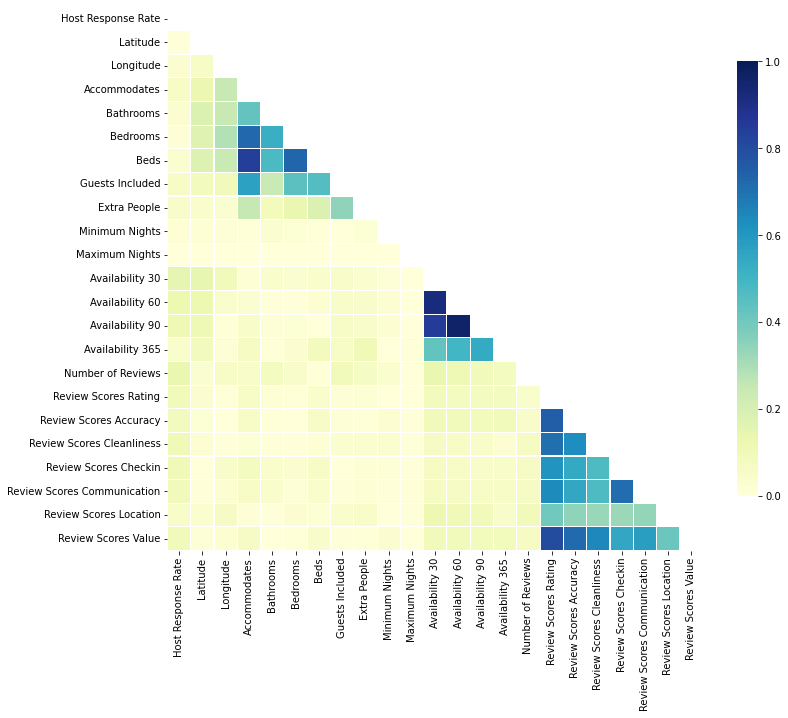

In [15]:
# Comprobar las variables redundantes
import seaborn as sns

# Compute the correlation matrix
corr = np.abs(full_df.drop(['Price'], axis=1).corr())
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

# puedo representar solo la parte inferior ya que es simétrica

In [16]:
reviews = full_df.loc[: , "Review Scores Rating":"Review Scores Value"]
full_df['Average Review'] = reviews.mean(axis=1)

full_df.drop(['Availability 30', 'Availability 60', 'Availability 90', 'Review Scores Rating', 
         'Review Scores Accuracy', 'Review Scores Cleanliness', 'Review Scores Checkin',
       'Review Scores Communication', 'Review Scores Location', 'Review Scores Value',
        'Accommodates'], axis=1, inplace=True)

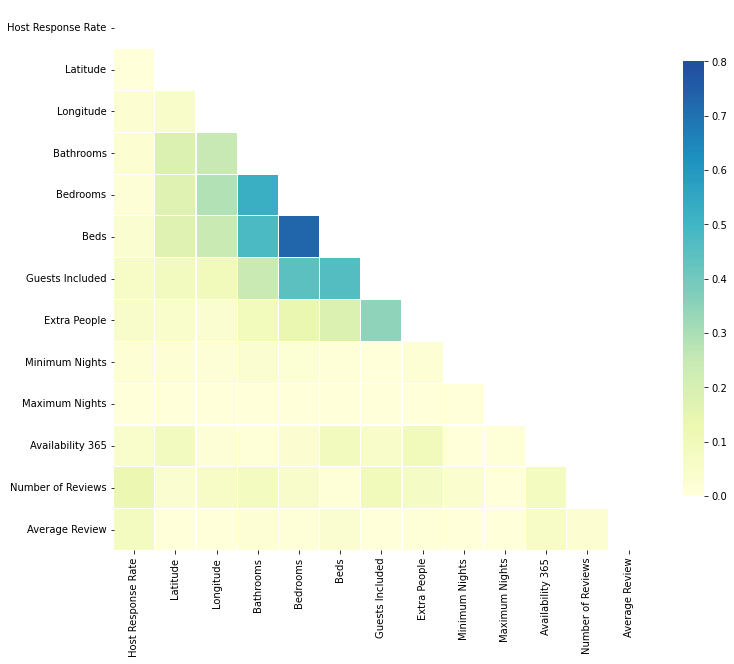

In [17]:
# Compute the correlation matrix
corr = np.abs(full_df.drop(['Price'], axis=1).corr())
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=0.8, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

# La matriz de correlación tiene mejor pinta

In [18]:
full_df.columns

Index(['Experiences Offered', 'Thumbnail Url', 'Host Since',
       'Host Response Time', 'Host Response Rate', 'Host Verifications',
       'Neighbourhood', 'Neighbourhood Cleansed',
       'Neighbourhood Group Cleansed', 'City', 'Country Code', 'Latitude',
       'Longitude', 'Property Type', 'Room Type', 'Bathrooms', 'Bedrooms',
       'Beds', 'Bed Type', 'Amenities', 'Price', 'Guests Included',
       'Extra People', 'Minimum Nights', 'Maximum Nights', 'Availability 365',
       'Number of Reviews', 'Cancellation Policy', 'Features',
       'Average Review'],
      dtype='object')

Por último, podemos hacer una representación (scatter_plot) de todas las variables frente al resto, para tener una idea de cómo se relacionan las variables del problema.

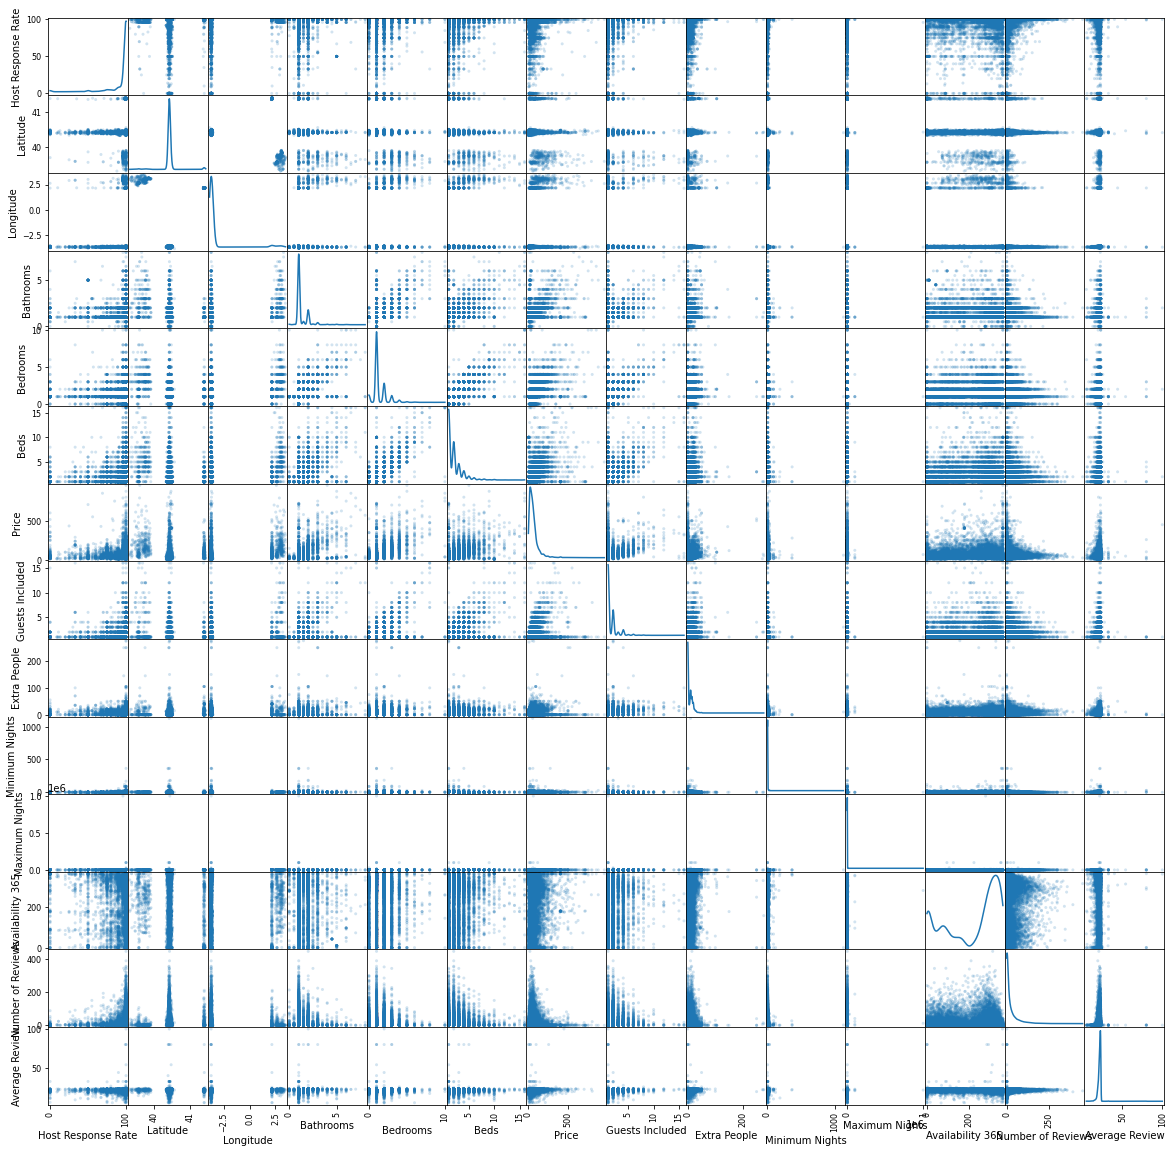

In [19]:
pd.plotting.scatter_matrix(full_df, alpha=0.2, figsize=(20, 20), diagonal = 'kde')
plt.show()

In [20]:
# Después del análisis se ha conseguido
full_df.shape

(14001, 30)

In [21]:
full_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Host Response Rate,12254.0,94.889179,15.121876,0.000000,100.000000,100.000000,100.000000,100.000000
Latitude,14001.0,40.420834,0.188691,39.317472,40.409629,40.418581,40.428537,41.434567
Longitude,14001.0,-3.397424,1.342867,-3.863907,-3.707457,-3.701034,-3.689788,3.467897
Bathrooms,13949.0,1.286580,0.666211,0.000000,1.000000,1.000000,1.000000,8.000000
Bedrooms,13977.0,1.349288,0.907924,0.000000,1.000000,1.000000,2.000000,10.000000
Beds,13952.0,2.065367,1.634259,1.000000,1.000000,2.000000,2.000000,16.000000
Price,13990.0,71.515154,67.863596,9.000000,32.000000,55.000000,85.000000,950.000000
Guests Included,14001.0,1.597314,1.194920,1.000000,1.000000,1.000000,2.000000,16.000000
Extra People,14001.0,7.469824,11.331825,0.000000,0.000000,0.000000,14.000000,276.000000
Minimum Nights,14001.0,3.045354,12.538137,1.000000,1.000000,2.000000,3.000000,1125.000000


In [22]:
#Creo una nueva característica para aunar los vecindarios
full_df["Final Neighbourhood"] = full_df["Neighbourhood Group Cleansed"].fillna(full_df["Neighbourhood Cleansed"])

In [23]:
full_df.drop(["Neighbourhood", "Neighbourhood Group Cleansed", "Neighbourhood Cleansed"], axis=1, inplace=True)

In [24]:
# Hay otras variables que requerirían NLP para procesar la importancia
# 'Features', 'Amenities', 'Host Verifications'
# Los cuento por si aportan algo
full_df['Features'].fillna("", inplace=True)
full_df['Amenities'].fillna("", inplace=True)
full_df['Host Verifications'].fillna("", inplace=True)

full_df['Features'] = full_df['Features'].apply(lambda x: len(str(x).split(',')))
full_df['Amenities'] = full_df['Amenities'].apply(lambda x: len(str(x).split(',')))
full_df['Host Verifications'] = full_df['Host Verifications'].apply(lambda x: len(str(x).split(',')))

In [25]:
full_df.columns

Index(['Experiences Offered', 'Thumbnail Url', 'Host Since',
       'Host Response Time', 'Host Response Rate', 'Host Verifications',
       'City', 'Country Code', 'Latitude', 'Longitude', 'Property Type',
       'Room Type', 'Bathrooms', 'Bedrooms', 'Beds', 'Bed Type', 'Amenities',
       'Price', 'Guests Included', 'Extra People', 'Minimum Nights',
       'Maximum Nights', 'Availability 365', 'Number of Reviews',
       'Cancellation Policy', 'Features', 'Average Review',
       'Final Neighbourhood'],
      dtype='object')

In [26]:
# Generación de características - Antigüedad del dueño
from datetime import datetime

full_df.dropna(subset=['Host Since'], inplace=True) # se ha visto antes que solo hay tres valores missing, no se pierde mucho

full_df['Host Since'] = full_df['Host Since'].apply(lambda x: datetime.strptime(str(x),'%Y-%m-%d'))
full_df['Years Being Host'] = full_df['Host Since'].apply(lambda x: 2017 - x.year)

full_df.drop(['Host Since'], axis=1, inplace=True)

In [27]:
# Revisión de datos
list(full_df.select_dtypes(include=['object']).columns)

['Experiences Offered',
 'Thumbnail Url',
 'Host Response Time',
 'City',
 'Country Code',
 'Property Type',
 'Room Type',
 'Bed Type',
 'Cancellation Policy',
 'Final Neighbourhood']

In [28]:
df_nn = full_df[list(full_df.select_dtypes(include=['object']).columns)]
df_nn.apply(lambda x: len(x.unique())) # valores diferentes

Experiences Offered        1
Thumbnail Url          11284
Host Response Time         5
City                     136
Country Code               1
Property Type             22
Room Type                  3
Bed Type                   5
Cancellation Policy        5
Final Neighbourhood       72
dtype: int64

In [29]:
len(df_nn) - df_nn.count() # solo thumbnail y host response time tienen missing values

Experiences Offered       0
Thumbnail Url          2712
Host Response Time     1744
City                      6
Country Code              0
Property Type             0
Room Type                 0
Bed Type                  0
Cancellation Policy       0
Final Neighbourhood       0
dtype: int64

In [30]:
df_nn["Host Response Time"].value_counts()

within an hour        7550
within a few hours    2734
within a day          1688
a few days or more     282
Name: Host Response Time, dtype: int64

Como no tenemos más datos, rellenamos con la opción más frecuente, en este caso within an hour, sobre el dataset original.

In [31]:
full_df["Host Response Time"].fillna(full_df["Host Response Time"].mode()[0], inplace=True)

In [32]:
full_df["Experiences Offered"].value_counts()

none    13998
Name: Experiences Offered, dtype: int64

In [33]:
# Experiences Offered tiene casi todo a none, no aporta
full_df.drop(['Experiences Offered'], axis=1, inplace=True)

In [34]:
df_nn["City"].value_counts()

Madrid                                 13204
Barcelona                                292
马德里                                       52
Palma                                     49
Alcúdia                                   40
Madrid, Comunidad de Madrid, ES           20
Palma de Mallorca                         16
Selva                                     13
Inca                                      13
Búger                                     11
Pollença                                  10
Deià                                       9
Santa Margalida                            8
madrid                                     8
Sóller                                     7
Sant Llorenç des Cardassar                 6
La Puebla                                  6
Manacor                                    6
Pollensa                                   6
Valldemossa                                6
Campanet                                   6
Santa Maria del Camí                       5
Alaró     

In [35]:
df_nn["Country Code"].value_counts()

ES    13998
Name: Country Code, dtype: int64

In [36]:
# Son muy ruidosos
full_df.drop(['City', 'Country Code'], axis=1, inplace=True)

In [37]:
# Qué columnas quedan?
full_df.columns

Index(['Thumbnail Url', 'Host Response Time', 'Host Response Rate',
       'Host Verifications', 'Latitude', 'Longitude', 'Property Type',
       'Room Type', 'Bathrooms', 'Bedrooms', 'Beds', 'Bed Type', 'Amenities',
       'Price', 'Guests Included', 'Extra People', 'Minimum Nights',
       'Maximum Nights', 'Availability 365', 'Number of Reviews',
       'Cancellation Policy', 'Features', 'Average Review',
       'Final Neighbourhood', 'Years Being Host'],
      dtype='object')

Carga de Imágenes

In [ ]:
import imageio as io
import numpy as np
import cv2
n_images = 1000
images = np.zeros((n_images, 224, 224, 3), dtype=np.uint8)
urls = full_df['Thumbnail Url']

i_aux = 0
good_urls = []
for i_img, url in enumerate(urls):
    if len(good_urls) >= n_images:
        # ya tenemos n_images imágenes
        break
    try:
        img = io.imread(url)
        images[i_aux] = cv2.resize(img, (224, 224))
        good_urls.append(i_img)
        i_aux += 1
        print(f'Imagen {i_img} descargada')
        print(len(good_urls))
    except IOError as err:
        pass

In [38]:
# Visualizamos las imágenes cargadas
print(images.shape)

(1000, 224, 224, 3)


In [40]:
# Mantenemos los datos numéricos solo para aquellos pisos que tienen imágenes 
# y las hemos obtenido
final_data = full_df.iloc[good_urls, :]
print(final_data.shape)

(867, 27)


In [41]:
# Obtener las etiquetas de regresion
y_reg = final_data['Price']

In [42]:
# guardamos las imágenes (y yo os recomiendo que os lo guardéis en GDrive para evitar tener que repetir esto)
np.save('images.npy', images)
np.save('final_data.npy', final_data)

# Para cargar de local
# np.load('images.npy')

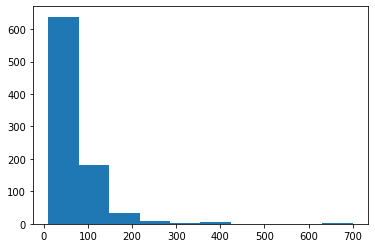

In [43]:
# y un rango para clasificación (del 1 al 3 por ejemplo: barato, normal, caro)
import matplotlib.pyplot as plt
plt.hist(y_reg, bins=10)
plt.show()

In [44]:
y_class = []
for x in y_reg:
    # barato
    if x <= 50:
        y_class.append(0)
    elif x <=150:
        y_class.append(1)
    else:
        y_class.append(2)

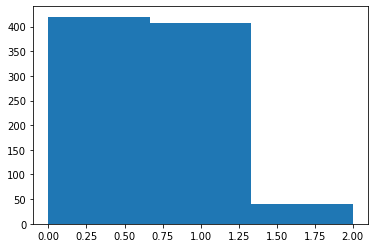

In [45]:
# veamos cómo ha quedado la distribución al convertirla a 3 clases
plt.hist(y_class, bins=3)
plt.show()

## Normalización de etiquetas de 0-1

In [38]:
max_price = full_df['Price'].max()
print(max_price)


950.0


In [39]:
full_df['Average Review'] = full_df['Average Review'].fillna(full_df['Average Review'].mean())

In [40]:
full_df['Host Response Rate'] = full_df['Host Response Rate'].fillna(full_df['Host Response Rate'].mean())

In [41]:
full_df.dropna(inplace=True)

In [42]:
print(f'El dataframe tiene un total de {len(full_df)} filas.')
len(full_df) - full_df.count() # vemos cuántos valores NaN hay por columna

# full_df.isnull().any() # vemos qué columnas tienen valores NaN

El dataframe tiene un total de 11212 filas.


Thumbnail Url          0
Host Response Time     0
Host Response Rate     0
Host Verifications     0
Latitude               0
Longitude              0
Property Type          0
Room Type              0
Bathrooms              0
Bedrooms               0
Beds                   0
Bed Type               0
Amenities              0
Price                  0
Guests Included        0
Extra People           0
Minimum Nights         0
Maximum Nights         0
Availability 365       0
Number of Reviews      0
Cancellation Policy    0
Features               0
Average Review         0
Final Neighbourhood    0
Years Being Host       0
dtype: int64

In [43]:
thumbnails = full_df["Thumbnail Url"]
full_df.drop("Thumbnail Url", axis=1, inplace=True)

In [47]:
# One Hot Encoding CHECK
list(full_df.select_dtypes(include=['object']).columns)

['Host Response Time',
 'Property Type',
 'Room Type',
 'Bed Type',
 'Cancellation Policy',
 'Final Neighbourhood']

In [48]:
full_df = pd.get_dummies(full_df, columns=['Host Response Time',
 'Property Type',
 'Room Type',
 'Bed Type',
 'Cancellation Policy',
 'Final Neighbourhood'])


In [50]:
full_df = full_df.astype(np.float32)

In [51]:
from sklearn.model_selection import train_test_split

# Preparamos la separación
y_data_full = full_df["Price"]
X_data_full = full_df.drop("Price", axis=1)

# Dividimos el conjunto de training en training y test #(X)
X_train, X_test, y_train, y_test = train_test_split(X_data_full, y_data_full, test_size=0.2, random_state=42)
# Dividimos el conjunto de training en training y validation #(X)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

# Normalizamos los datos en el rango de 0-1 para que computacionalmente sea más eficiente el proceso #(X)
# Usamos el precio máximo de las etiquetas
y_train, y_val, y_test = y_train / max_price, y_val / max_price, y_test / max_price

In [60]:
X_train.head()

,Host Response Rate,Host Verifications,Latitude,Longitude,Bathrooms,Bedrooms,Beds,Amenities,Guests Included,Extra People,Minimum Nights,Maximum Nights,Availability 365,Number of Reviews,Features,Average Review,Years Being Host,Host Response Time_a few days or more,Host Response Time_within a day,Host Response Time_within a few hours,Host Response Time_within an hour,Property Type_Apartment,Property Type_Bed & Breakfast,Property Type_Boat,Property Type_Boutique hotel,Property Type_Bungalow,Property Type_Camper/RV,Property Type_Casa particular,Property Type_Chalet,Property Type_Condominium,Property Type_Dorm,Property Type_Earth House,Property Type_Guest suite,Property Type_Guesthouse,Property Type_Hostel,Property Type_House,Property Type_Loft,Property Type_Other,Property Type_Serviced apartment,Property Type_Tent,Property Type_Timeshare,Property Type_Townhouse,Property Type_Villa,Room Type_Entire home/apt,Room Type_Private room,Room Type_Shared room,Bed Type_Airbed,Bed Type_Couch,Bed Type_Futon,Bed Type_Pull-out Sofa,Bed Type_Real Bed,Cancellation Policy_flexible,Cancellation Policy_moderate,Cancellation Policy_strict,Cancellation Policy_super_strict_30,Cancellation Policy_super_strict_60,Final Neighbourhood_Alaró,Final Neighbourhood_Alcúdia,Final Neighbourhood_Algaida,Final Neighbourhood_Andratx,Final Neighbourhood_Arganzuela,Final Neighbourhood_Artà,Final Neighbourhood_Barajas,Final Neighbourhood_Binissalem,Final Neighbourhood_Búger,Final Neighbourhood_Calvià,Final Neighbourhood_Capdepera,Final Neighbourhood_Carabanchel,Final Neighbourhood_Centro,Final Neighbourhood_Chamartín,Final Neighbourhood_Chamberí,Final Neighbourhood_Ciudad Lineal,Final Neighbourhood_Ciutat Vella,Final Neighbourhood_Costitx,Final Neighbourhood_Deyá,Final Neighbourhood_Eixample,Final Neighbourhood_Felanitx,Final Neighbourhood_Fuencarral - El Pardo,Final Neighbourhood_Gràcia,Final Neighbourhood_Horta-Guinardó,Final Neighbourhood_Hortaleza,Final Neighbourhood_Inca,Final Neighbourhood_Latina,Final Neighbourhood_Les Corts,Final Neighbourhood_Lloret de Vistalegre,Final Neighbourhood_Llubí,Final Neighbourhood_Llucmajor,Final Neighbourhood_Manacor,Final Neighbourhood_Moncloa - Aravaca,Final Neighbourhood_Moratalaz,Final Neighbourhood_Nou Barris,Final Neighbourhood_Palma de Mallorca,Final Neighbourhood_Pollença,Final Neighbourhood_Puente de Vallecas,Final Neighbourhood_Retiro,Final Neighbourhood_Sa Pobla,Final Neighbourhood_Salamanca,Final Neighbourhood_San Blas - Canillejas,Final Neighbourhood_Sant Joan,Final Neighbourhood_Sant Martí,Final Neighbourhood_Santa Margalida,Final Neighbourhood_Santa María del Camí,Final Neighbourhood_Santanyí,Final Neighbourhood_Sants-Montjuïc,Final Neighbourhood_Sarrià-Sant Gervasi,Final Neighbourhood_Selva,Final Neighbourhood_Ses Salines,Final Neighbourhood_Sineu,Final Neighbourhood_Son Servera,Final Neighbourhood_Sóller,Final Neighbourhood_Tetuán,Final Neighbourhood_Usera,Final Neighbourhood_Valldemossa,Final Neighbourhood_Vicálvaro,Final Neighbourhood_Villa de Vallecas,Final Neighbourhood_Villaverde
172,100.000000,3.0,40.421146,-3.704555,1.0,0.0,1.0,18.0,1.0,0.0,1.0,1125.0,31.0,11.0,4.0,20.142857,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
395,88.000000,3.0,40.379265,-3.733012,1.0,2.0,3.0,20.0,1.0,0.0,5.0,21.0,355.0,0.0,4.0,21.257017,3.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [59]:
y_train.head()

172     0.038947
395     0.147368
4266    0.068421
9663    0.084211
865     0.026316
Name: Price, dtype: float32

Creación del modelo

In [65]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers.schedules import ExponentialDecay
import matplotlib.pyplot as plt

# definimos la función para entrenar nuestra red con los parámetros deseados
def train_network_decay_fnact_b1_mse(activation_function, learning_rate, lr_decay, batch_size, num_epochs):
  
  # Implementamos la red empleando Keras
  model = Sequential() # Instancia de modelo API secuencial #(X)
  model.add(Dense(8, activation=activation_function,  kernel_initializer='random_uniform', bias_initializer='ones', input_shape=(X_train.shape[1],)))
  model.add(Dense(4, activation=activation_function))
  model.add(Dense(1, activation=tf.nn.sigmoid))
  # Compilamos y entrenamos el modelo SGD
  print("[INFO]: Entrenando red neuronal...")
  decay_steps = 1000
  decay_rate = 0.96

  lr_schedule = ExponentialDecay(
    initial_learning_rate=learning_rate,
    decay_steps=decay_steps,
    decay_rate=decay_rate)

  model.compile(loss="mse", optimizer=SGD(lr_schedule), metrics=["accuracy"])  #(X)

  # Entrenando la solución
  H = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=num_epochs, batch_size=batch_size)  #(X)

  # Evaluando el modelo de predicción con las imágenes de test
  print("[INFO]: Evaluando red neuronal...")
  predictions = model.predict(X_test, batch_size=batch_size)  #(X)
  #print(classification_report(y_test.argmax(axis=1), predictions.argmax(axis=1)))

  # Muestro gráfica de accuracy y losses
  plt.style.use("ggplot")
  plt.figure()
  plt.plot(np.arange(0, num_epochs), H.history["loss"], label="train_loss")
  plt.plot(np.arange(0, num_epochs), H.history["val_loss"], label="val_loss")
  plt.plot(np.arange(0, num_epochs), H.history["accuracy"], label="train_acc")
  plt.plot(np.arange(0, num_epochs), H.history["val_accuracy"], label="val_acc")
  plt.title("Training Loss and Accuracy")
  plt.xlabel("Epoch #")
  plt.ylabel("Loss/Accuracy")
  plt.legend()

[INFO]: Entrenando red neuronal...
Epoch 1/10
64/64 [==============================] - 3s 42ms/step - loss: 0.0091 - accuracy: 0.0000e+00 - val_loss: 0.0114 - val_accuracy: 0.0000e+00
Epoch 2/10
64/64 [==============================] - 0s 3ms/step - loss: 0.0089 - accuracy: 0.0000e+00 - val_loss: 0.0115 - val_accuracy: 0.0000e+00
Epoch 3/10
64/64 [==============================] - 0s 3ms/step - loss: 0.0089 - accuracy: 0.0000e+00 - val_loss: 0.0115 - val_accuracy: 0.0000e+00
Epoch 4/10
64/64 [==============================] - 0s 3ms/step - loss: 0.0089 - accuracy: 0.0000e+00 - val_loss: 0.0114 - val_accuracy: 0.0000e+00
Epoch 5/10
64/64 [==============================] - 0s 3ms/step - loss: 0.0088 - accuracy: 0.0000e+00 - val_loss: 0.0111 - val_accuracy: 0.0000e+00
Epoch 6/10
64/64 [==============================] - 0s 3ms/step - loss: 0.0082 - accuracy: 0.0000e+00 - val_loss: 0.0107 - val_accuracy: 0.0000e+00
Epoch 7/10
64/64 [==============================] - 0s 3ms/step - loss: 0.00

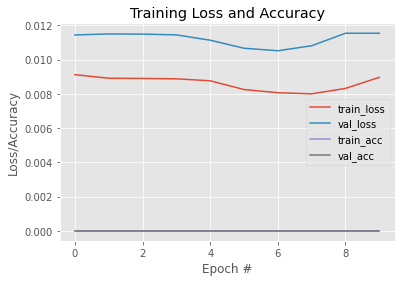

In [66]:
import tensorflow as tf

# probamos la tanh, bias = 1 y loss_fn = mse
activation_function = tf.nn.relu
learning_rate = 0.1
lr_decay = 1e-3
num_epochs = 10
batch_size = 128
train_network_decay_fnact_b1_mse(activation_function, learning_rate, lr_decay, batch_size, num_epochs)